<a href="https://colab.research.google.com/github/ryanxyed/Academic-project/blob/main/Emergency_vehicle_identification_for_real_time_traffic_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub
abhisheksinghblr_emergency_vehicles_identification_path = kagglehub.dataset_download('abhisheksinghblr/emergency-vehicles-identification')

print('Data source import complete.')


100%|██████████| 30.9M/30.9M [00:00<00:00, 38.4MB/s]

Extracting files...


Data source import complete.


In [ ]:
print(abhisheksinghblr_emergency_vehicles_identification_path)

/root/.cache/kagglehub/datasets/abhisheksinghblr/emergency-vehicles-identification/versions/1


In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
ls /root/.cache/kagglehub/datasets/abhisheksinghblr/emergency-vehicles-identification/versions/1/Emergency_Vehicles/

sample_submission.csv  test/  test.csv  train/  train.csv


In [ ]:
train_dir = "/root/.cache/kagglehub/datasets/abhisheksinghblr/emergency-vehicles-identification/versions/1/Emergency_Vehicles/train"
test_dir = "/root/.cache/kagglehub/datasets/abhisheksinghblr/emergency-vehicles-identification/versions/1/Emergency_Vehicles/test"
train_df = pd.read_csv('/root/.cache/kagglehub/datasets/abhisheksinghblr/emergency-vehicles-identification/versions/1/Emergency_Vehicles/train.csv')
train_df.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


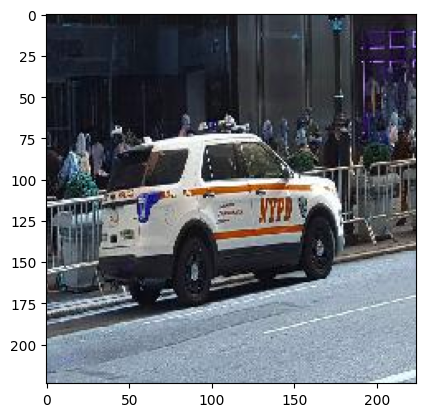

In [ ]:
im = cv2.imread("/root/.cache/kagglehub/datasets/abhisheksinghblr/emergency-vehicles-identification/versions/1/Emergency_Vehicles/train/1011.jpg")
plt.imshow(im)

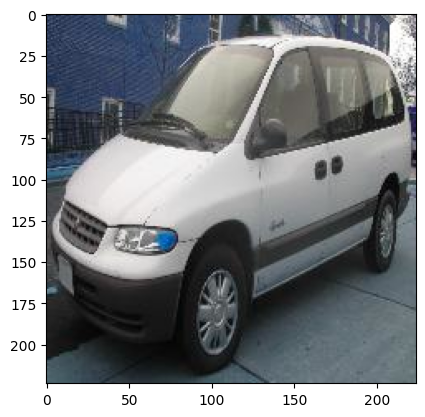

In [ ]:
im2 = cv2.imread("/root/.cache/kagglehub/datasets/abhisheksinghblr/emergency-vehicles-identification/versions/1/Emergency_Vehicles/train/2141.jpg")
plt.imshow(im2)

In [ ]:
train_df.emergency_or_not=train_df.emergency_or_not.astype(str)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip = True)
batch_size = 32

In [ ]:
traingen = datagen.flow_from_dataframe(dataframe = train_df[:1150],directory = train_dir,x_col ='image_names',
                                            y_col = 'emergency_or_not',class_mode = 'binary',batch_size = batch_size,
                                            target_size = (32,32))


valgen = datagen.flow_from_dataframe(dataframe = train_df[1151:],directory = train_dir,x_col = 'image_names',
                                                y_col ='emergency_or_not',class_mode ='binary',batch_size = 50,
                                                target_size = (32,32))

Found 1150 validated image filenames belonging to 2 classes.
Found 495 validated image filenames belonging to 2 classes.


In [ ]:
trainsample = next(traingen)
print("Dimensions of training sample",trainsample[0].shape)
valsample = next(valgen)
print("Dimensions of validation sample",valsample[0].shape)

Dimensions of training sample (32, 32, 32, 3)
Dimensions of validation sample (50, 32, 32, 3)


In [ ]:
num_train_samples = traingen.samples
num_val_samples = valgen.samples

print("Number of training samples", num_train_samples)
print("Number of validation samples", num_val_samples)

Number of training samples 1150
Number of validation samples 495


In [ ]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

op = tf.keras.optimizers.Adam(learning_rate = 0.001)
loss = tf.keras.losses.BinaryCrossentropy(from_logits = False)
model.compile(optimizer = op, loss = loss, metrics = ['accuracy'])

history = model.fit(traingen, steps_per_epoch = int(num_train_samples/50),
                    epochs = 50, validation_data = valgen,
                    validation_steps = int(num_val_samples/50))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.5329 - loss: 0.8203 - val_accuracy: 0.6400 - val_loss: 0.6654
Epoch 2/50
13/23 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6345 - loss: 0.6587

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6335 - loss: 0.6536 - val_accuracy: 0.7156 - val_loss: 0.6116
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.6978 - loss: 0.6065 - val_accuracy: 0.7533 - val_loss: 0.5419
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7403 - loss: 0.5344 - val_accuracy: 0.7667 - val_loss: 0.4970
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7841 - loss: 0.5004 - val_accuracy: 0.7378 - val_loss: 0.5309
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7637 - loss: 0.4862 - val_accuracy: 0.7711 - val_loss: 0.4868
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.7969 - loss: 0.4299 - val_accuracy: 0.7867 - val_loss: 0.4602
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8063 - loss: 0.4321 - val_accuracy: 0.7756 - val_loss: 0.4565
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.7833 - loss: 0.4532 - val_accuracy: 0.7756 - val_loss:

In [ ]:
# prompt: save the dataset to gdrive

from google.colab import drive
drive.mount('/content/drive')

!cp -r /root/.cache/kagglehub/datasets/abhisheksinghblr/emergency-vehicles-identification/versions/1/Emergency_Vehicles /content/drive/MyDrive/

Mounted at /content/drive
^C


In [ ]:
# prompt: save the model to gdrive

model.save('/content/drive/MyDrive/emergency_vehicle_model.keras')


In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

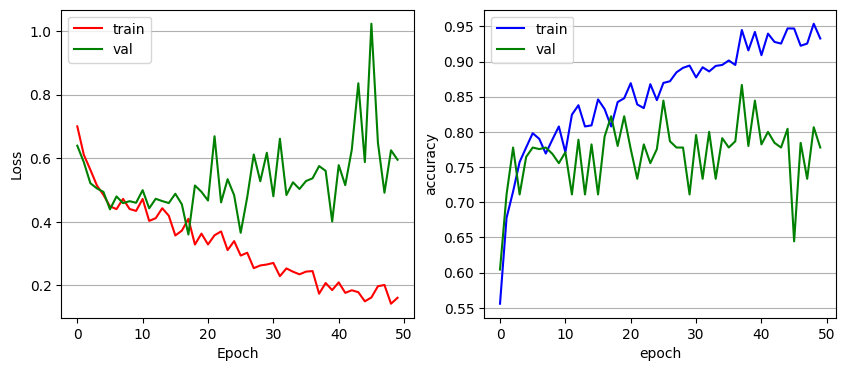

In [ ]:
figure = plt.figure(figsize = (10,4))
ax = plt.subplot(121)

ax.plot(history.history['loss'], 'r', label = 'train')
ax.plot(history.history['val_loss'],'g',label = 'val')

plt.legend()
plt.grid(axis = 'y')
plt.xlabel("Epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("Emergency dataset with data augmentation")

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: gradio ui

!pip install gradio

import gradio as gr
import tensorflow as tf
import cv2
import numpy as np

# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/emergency_vehicle_model.keras')

def classify_image(image):
    # Preprocess the image (resize and normalize)
    image = cv2.resize(image, (32, 32))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)

    # Make prediction
    prediction = model.predict(image)

    # Assuming binary classification (0 or 1)
    predicted_class = "Emergency Vehicle" if prediction[0][0] > 0.2 else "Not an Emergency Vehicle"
    probability = prediction[0][0]
    return predicted_class, probability


iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="numpy"),
    outputs=[gr.Textbox(label="Predicted Class"), gr.Number(label="Probability")],
    title="Emergency Vehicle Classifier",
    description="Upload an image to classify it as an emergency vehicle or not."
)

iface.launch(debug=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 1.5 MB/s eta 0:00:00


ValueError: File not found: filepath=/content/drive/MyDrive/emergency_vehicle_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
# early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('model_es.h5', monitor = 'val_loss',verbose=0, save_best_only=True)

In [ ]:
# model2 = Sequential()
# model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
# model2.add(tf.keras.layers.MaxPooling2D(2,2))
# model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
# model2.add(tf.keras.layers.Flatten())
# model2.add(tf.keras.layers.Dense(10))
# model2.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# callbacks = [early_stopping_callback, model_checkpoint_callback]

# model2.compile(optimizer = op,
#               loss = loss,
#               metrics=['accuracy'])

# history2 = model2.fit(traingen, steps_per_epoch = num_train_samples/50,
#                     epochs = 50, validation_data = valgen,
#                     validation_steps = num_val_samples/50, callbacks = callbacks)

# model2.summary()

In [ ]:
# history2.history.keys()

In [ ]:
# figure = plt.figure(figsize = (10,4))

# ax = plt.subplot(121)
# ax.plot(history2.history['loss'], 'r', label = 'train')
# ax.plot(history2.history['val_loss'],'g',label = 'val')
# plt.legend()
# plt.grid(axis = 'y')
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.title("CNN + Data Augmentation + Early Stopping - Epoch VS Loss")

In [ ]:
# ax2 = plt.subplot(122)
# ax2.plot(history2.history['accuracy'], 'b', label="train")
# ax2.plot(history2.history['val_accuracy'], 'g', label="val")
# plt.legend()
# plt.xlabel("epoch")
# plt.ylabel("accuracy")
# plt.grid(axis='y')

# plt.title("CNN + Data Augmentation + Early Stopping - Epoch vs Accuracy")
# plt.savefig("Emergency dataset with data augmentation + early stopping")

In [ ]:
# model3 = Sequential()

# model3.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same")),
# model3.add(tf.keras.layers.MaxPooling2D(2,2)),
# model3.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same")),
# model3.add(tf.keras.layers.Flatten()),
# model3.add(tf.keras.layers.Dropout(0.2)),
# model3.add(tf.keras.layers.Dense(10)),
# model3.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))



# model3.compile(optimizer = op,
#               loss = loss,
#               metrics=['accuracy'])

# history3 = model3.fit(traingen, steps_per_epoch = num_train_samples/50,
#                     epochs = 50, validation_data = valgen,
#                     validation_steps = num_val_samples/50)

In [ ]:
# figure = plt.figure(figsize = (10,4))
# ax = plt.subplot(121)

# ax.plot(history3.history['loss'], 'r', label = 'train')
# ax.plot(history3.history['val_loss'],'g',label = 'val')

# plt.legend()
# plt.grid(axis = 'y')
# plt.xlabel("Epoch")
# plt.ylabel("Loss")


# plt.title("CNN + Data Augmentation  + Dropout = 0.2 - Epoch Vs loss")
# plt.savefig("Emergency dataset with data augmentation + early stopping")

In [ ]:
# ax2 = plt.subplot(122)
# ax2.plot(history3.history['accuracy'], 'b', label="train")
# ax2.plot(history3.history['val_accuracy'], 'g', label="val")
# plt.legend()
# plt.xlabel("epoch")
# plt.ylabel("accuracy")
# plt.grid(axis='y')

# plt.title("CNN + Data Augmentation + Dropout = 0.2 - Epoch vs Accuracy")
# plt.savefig("Emergency dataset with data augmentation + early stopping")

In [ ]:
# model4 = Sequential()
# model4.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
# model4.add(tf.keras.layers.MaxPooling2D(2,2))
# model4.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
# model4.add(tf.keras.layers.Flatten())
# model4.add(tf.keras.layers.Dropout(0.4))
# model4.add(tf.keras.layers.Dense(10))
# model4.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))


# model4.compile(optimizer = op,
#               loss = loss,
#               metrics=['accuracy'])

# history4 = model4.fit(traingen, steps_per_epoch = num_train_samples/50,
#                     epochs = 50, validation_data = valgen,
#                     validation_steps = num_val_samples/50)

In [ ]:
# figure = plt.figure(figsize = (10,4))

# ax = plt.subplot(121)
# ax.plot(history2.history['loss'], 'b', label = 'train')
# ax.plot(history2.history['val_loss'],'g',label = 'val')
# plt.legend()
# plt.grid(axis = 'y')
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.title("CNN + Data Augmentation + Dropout = 0.4 - Epoch VS Loss")

In [ ]:
# figure = plt.figure(figsize = (10,4))

# ax = plt.subplot(121)
# ax.plot(history2.history['accuracy'], 'r', label = 'train')
# ax.plot(history2.history['val_accuracy'],'g',label = 'val')
# plt.legend()
# plt.grid(axis = 'y')
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.title("CNN + Data Augmentation + Dropout = 0.4 - Epoch VS Accuracy")

In [ ]:
# model5 = Sequential()
# model5.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), kernel_regularizer=tf.keras.regularizers.l1(0.01)))
# model5.add(tf.keras.layers.MaxPooling2D(2,2))
# model5.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
# model5.add(tf.keras.layers.Flatten())
# model5.add(tf.keras.layers.Dense(10))
# model5.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))


# model5.compile(optimizer = op,
#               loss = loss,
#               metrics=['accuracy'])

# history5 = model5.fit(traingen, steps_per_epoch = num_train_samples/50,
#                     epochs = 50, validation_data = valgen,
#                     validation_steps = num_val_samples/50)

In [ ]:
# figure = plt.figure(figsize = (10,4))

# ax = plt.subplot(121)
# ax.plot(history5.history['loss'], 'b', label = 'train')
# ax.plot(history5.history['val_loss'],'g',label = 'val')
# plt.legend()
# plt.grid(axis = 'y')
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.title("CNN + Data Augmentation + L1 regularization - Epoch VS Loss")

In [ ]:
# figure = plt.figure(figsize = (10,4))

# ax = plt.subplot(121)
# ax.plot(history5.history['accuracy'], 'r', label = 'train')
# ax.plot(history5.history['val_accuracy'],'g',label = 'val')
# plt.legend()
# plt.grid(axis = 'y')
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.title("CNN + Data Augmentation + L1 regularization - Epoch VS Accuracy")

In [ ]:
# model6 = Sequential()
# model6.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# model6.add(tf.keras.layers.MaxPooling2D(2,2))
# model6.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
# model6.add(tf.keras.layers.Flatten())
# model6.add(tf.keras.layers.Dense(10))
# model6.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))


# model6.compile(optimizer = op,
#               loss = loss,
#               metrics=['accuracy'])

# history6 = model6.fit(traingen, steps_per_epoch = num_train_samples/50,
#                     epochs = 50, validation_data = valgen,
#                     validation_steps = num_val_samples/50)

In [ ]:
# figure = plt.figure(figsize = (10,4))

# ax = plt.subplot(121)
# ax.plot(history5.history['loss'], 'b', label = 'train')
# ax.plot(history5.history['val_loss'],'g',label = 'val')
# plt.legend()
# plt.grid(axis = 'y')
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.title("CNN + Data Augmentation + L2 regularization - Epoch VS Loss")

In [ ]:
# figure = plt.figure(figsize = (10,4))

# ax = plt.subplot(121)
# ax.plot(history5.history['accuracy'], 'r', label = 'train')
# ax.plot(history5.history['val_accuracy'],'g',label = 'val')
# plt.legend()
# plt.grid(axis = 'y')
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.title("CNN + Data Augmentation + L2 regularization - Epoch VS Accuracy")

In [ ]:
# # prompt: save all the models

# model.save('model.h5')
# model2.save('model2.h5')
# model3.save('model3.h5')
# model4.save('model4.h5')
# model5.save('model5.h5')
# model6.save('model6.h5')